In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [ ]:
class AgentState(TypedDict):
    number1: int
    operator: str
    number2: str
    finalNumber: int

In [49]:
def add(state:AgentState) -> AgentState:
    state["finalNumber"] = state["number1"] + state["number2"]

    return state

def sub(state:AgentState) -> AgentState:
    state["finalNumber"] = state["number1"] - state["number2"]

    return state

def to_increment(state:AgentState) -> AgentState:
    state["finalNumber"] = state["finalNumber"] * 100
    return state

def to_decrement(state:AgentState) -> AgentState:
    state["finalNumber"] = state["finalNumber"] * -100
    return state

def decider1(state:AgentState) -> AgentState:
    '''router node'''

    if state["operator"] == "+":
        return "addition_operation"
    elif state["operator"] == "-":
        return "substraction_operation"
    
def decider2(state:AgentState) -> AgentState:
    '''router2 node'''

    if state["operator"] == "+":
        return "to_increment"
    elif state["operator"] == "-":
        return "to_decrement"

In [50]:
graph = StateGraph(AgentState)

graph.add_node("addition_node", add)
graph.add_node("substraction_node", sub)

graph.add_node("router1", lambda state:state)

graph.add_edge(START, "router1")

graph.add_conditional_edges(
    "router1",
    decider1,
    {
        "addition_operation": "addition_node",
        "substraction_operation": "substraction_node",
    }
)

# app = graph.compile()
graph.add_node("router2", lambda state:state)
graph.add_node("increment_node", to_increment)
graph.add_node("decrement_node", to_decrement)

In [51]:
graph.add_edge("addition_node", "router2")
graph.add_edge("substraction_node", "router2")


graph.add_conditional_edges(
    "router2",
    decider2,
    {
        "to_increment": "increment_node",
        "to_decrement": "decrement_node",
    }
)

graph.add_edge("increment_node", END)
graph.add_edge("decrement_node", END)

app = graph.compile()

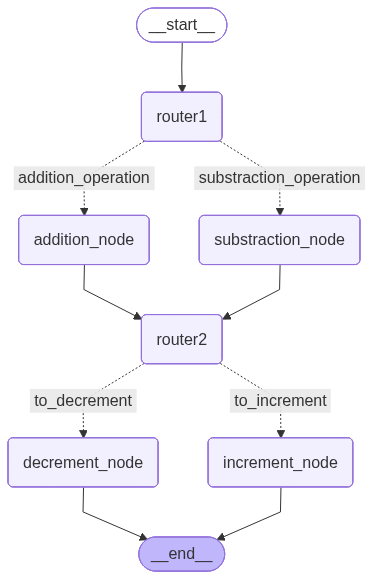

In [52]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [54]:
initial_sate = AgentState(number1 = 2, operator="+", number2 = 1)
print(app.invoke(initial_sate))

{'number1': 2, 'operator': '+', 'number2': 1, 'finalNumber': 300}
